Starting with some **EDA** in normalised data

Then starting with a simple **Feedforward Neural Network** with 2 hidden dense layers

### Hyperparametric Tuning
I have to find the best possible combination of hyperparameters in such a way that model is neither overfit nor underfit and giving a higher accuracy.

Model have many hypreparameters  
1.No of Layers  
2.No of units in different layers  
3.Activation function  
4.Epochs i.e. No of steps taken by Gradient decsent of reach minimum cost function

To achieve a better accuracy I tried many things listed down,most of the thingd doesn't worked.This is may be because the type of data.

First,I had tried different combinations of no, of layer,units and epochs but this didn't helped much.

Then I tried to average the predictions of many different model but this also didn't helped.

Then I tried to fit model on transformed data between 0 and 1.But this also didn't increased the accuracy.

### Error Analysis
Analysing misclassified examples:Checked if particular digit is generating significantly more error than other digits.Algorithm can be confuse between same looking digits like 6,8 and 9. Then we can increase algorithm attention to them by **Augmentating** more data of them by modifying existing examples.

To achieve this, I just doubled each example with target variable 9 and 5.But this doesn,t helped much.So, I stopped working in this direction.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mnist = tf.keras.datasets.mnist
(X_train_o, y_train), (X_test_o, y_test) = mnist.load_data()

X_train= tf.keras.utils.normalize(X_train_o, axis=1)  # Normalizing the data (making length = 1)
X_test=tf.keras.utils.normalize(X_test_o, axis=1)

X_train2=X_train_o/255
X_test2=X_test_o/255

# EDA

In [ ]:
X_train_o[1][12][12],X_train[1][12][12],X_train2[1][12][12]

In [3]:
X_train.shape,y_train.shape,X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
pd.DataFrame(X_train[1])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.305065,0.085838,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.483500,0.406872,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.447046,0.432624,0.068324,0.008591,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.161167,0.432624,0.303261,0.174688,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.184190,0.324468,0.303261,0.239123,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.090177,0.135624,0.305659,0.240554,0.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
pd.DataFrame(y_train)

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


<Axes: >

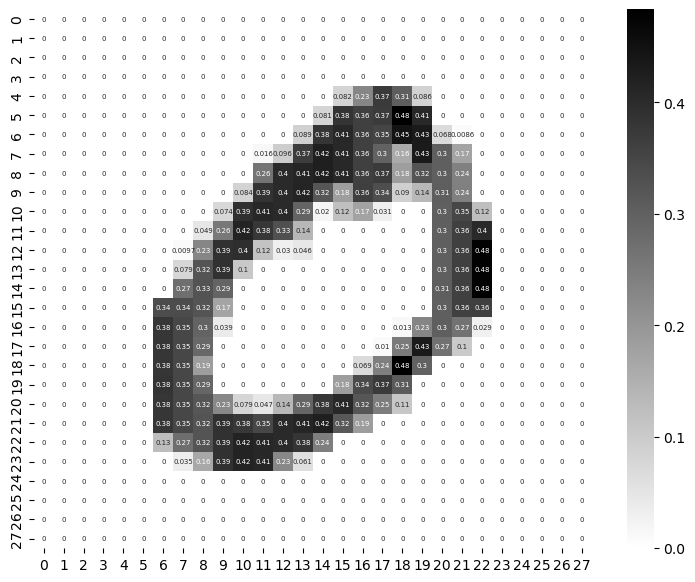

In [6]:
#sns.heatmap(X_train[1],annot=True,cmap=sns.color_palette("gray_r", as_cmap=True))
#sns.heatmap(X_train[1],annot=True,cmap=sns.color_palette("gray_r"))
plt.figure(figsize=(9, 7))
sns.heatmap(X_train[1],annot=True,annot_kws={"fontsize": 5},cmap=sns.color_palette("gray_r", as_cmap=True))

<Axes: >

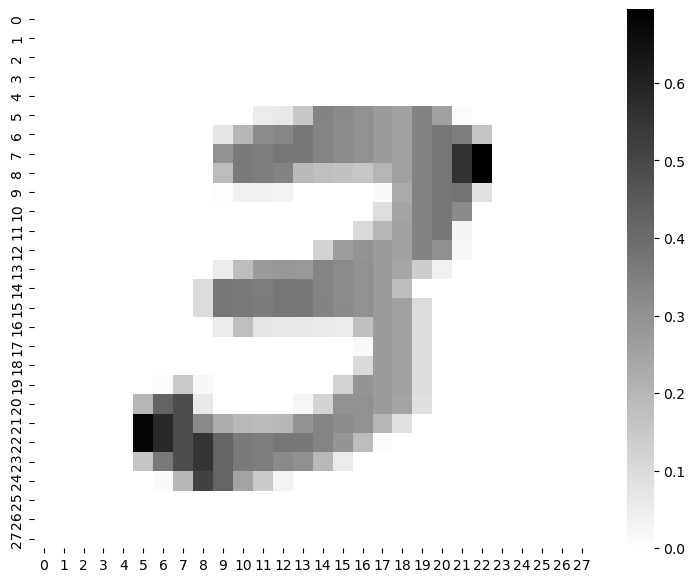

In [7]:
plt.figure(figsize=(9, 7))
sns.heatmap(X_train[7],cmap=sns.color_palette("gray_r", as_cmap=True))

C:\Users\VISHAL MAURYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\VISHAL MAURYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\VISHAL MAURYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='count'>

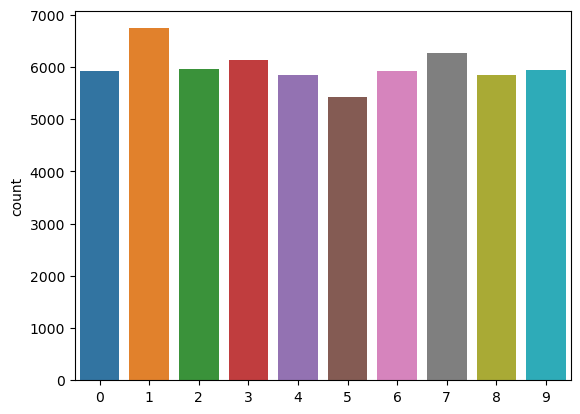

In [8]:
sns.countplot(x=y_train)

<Axes: >

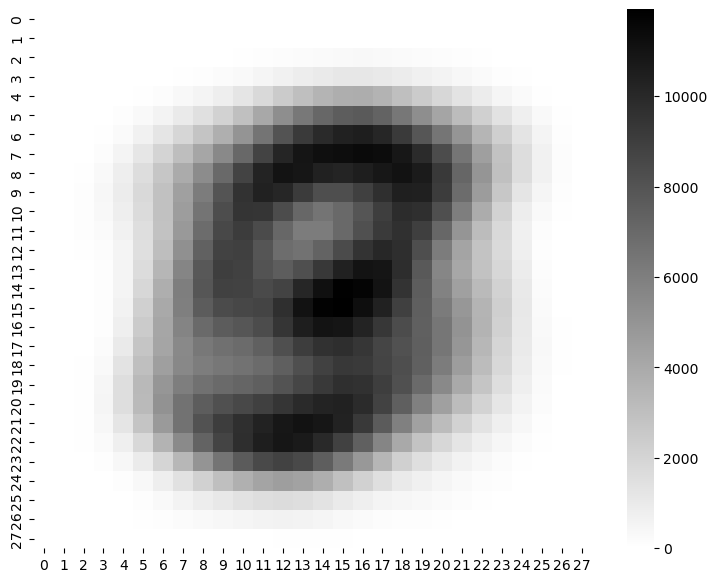

In [9]:
#All the digits plot
plt.figure(figsize=(9, 7))
sns.heatmap(sum(X_train),annot_kws={"fontsize": 5},cmap=sns.color_palette("gray_r", as_cmap=True))

# Feedforward Neural Network

In [91]:
model1 = tf.keras.models.Sequential()     
model1.add(tf.keras.layers.Flatten(input_shape=(28,28)))      # Converts 2D input into 1D input
model1.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=3)

val_loss, val_acc = model1.evaluate(X_train, y_train)
print(val_loss)
print(val_acc)

val_loss, val_acc = model1.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

Epoch 1/3
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2600 - accuracy: 0.9236
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1062 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0517 - accuracy: 0.9837
0.0517047643661499
0.9836500287055969
313/313 [==============================] - 1s 3ms/step - loss: 0.0972 - accuracy: 0.9694
0.09717695415019989
0.9693999886512756


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,np.argmax(model1.predict(X_test), axis=1))

313/313 [==============================] - 0s 1ms/step


0.9744

In [65]:
# Model for 0-1 transformed data
model22= tf.keras.models.Sequential()     
model22.add(tf.keras.layers.Flatten())      # Converts 2D input into 1D input
model22.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model22.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model22.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))
model22.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model22.fit(X_train2, y_train, epochs=3)
print(model1.evaluate(X_train_o, y_train))
print(model1.evaluate(X_test_o, y_test))

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2261 - accuracy: 0.9333
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0944 - accuracy: 0.9709
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 48.6062 - accuracy: 0.9637
[48.60615539550781, 0.9637166857719421]
313/313 [==============================] - 1s 3ms/step - loss: 59.6815 - accuracy: 0.9581
[59.68149948120117, 0.9581000208854675]


In [53]:
model2= tf.keras.models.Sequential()     
model2.add(tf.keras.layers.Flatten())      # Converts 2D input into 1D input
model2.add(tf.keras.layers.Dense(units=200, activation=tf.nn.relu))
model2.add(tf.keras.layers.Dense(units=50, activation=tf.nn.relu))
model2.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=3)
print(model2.evaluate(X_train, y_train))
print(model2.evaluate(X_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2576 - accuracy: 0.9251
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1023 - accuracy: 0.9686
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0437 - accuracy: 0.9872
[0.043703775852918625, 0.9872000217437744]
313/313 [==============================] - 1s 3ms/step - loss: 0.0906 - accuracy: 0.9723
[0.09063330292701721, 0.9722999930381775]


In [56]:
model3= tf.keras.models.Sequential()     
model3.add(tf.keras.layers.Flatten())      # Converts 2D input into 1D input
model3.add(tf.keras.layers.Dense(units=150, activation=tf.nn.relu))
model3.add(tf.keras.layers.Dense(units=100, activation=tf.nn.relu))
model3.add(tf.keras.layers.Dense(units=50, activation=tf.nn.relu))
model3.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=3)
print(model3.evaluate(X_train, y_train))
print(model3.evaluate(X_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2620 - accuracy: 0.9219
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1072 - accuracy: 0.9664
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0541 - accuracy: 0.9829
[0.05409498140215874, 0.98294997215271]
313/313 [==============================] - 1s 3ms/step - loss: 0.1014 - accuracy: 0.9697
[0.10140378773212433, 0.9696999788284302]


In [54]:
model4= tf.keras.models.Sequential()     
model4.add(tf.keras.layers.Flatten())      # Converts 2D input into 1D input
model4.add(tf.keras.layers.Dense(units=200, activation=tf.nn.relu))
model4.add(tf.keras.layers.Dense(units=100, activation=tf.nn.relu))
model4.add(tf.keras.layers.Dense(units=50, activation=tf.nn.relu))
model4.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4.fit(X_train, y_train, epochs=3)
print(model4.evaluate(X_train, y_train))
print(model4.evaluate(X_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2489 - accuracy: 0.9255
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0997 - accuracy: 0.9689
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0428 - accuracy: 0.9871
[0.04282435029745102, 0.9871333241462708]
313/313 [==============================] - 1s 3ms/step - loss: 0.0925 - accuracy: 0.9725
[0.0925331711769104, 0.9725000262260437]


In [62]:
model5= tf.keras.models.Sequential()     
model5.add(tf.keras.layers.Flatten())      # Converts 2D input into 1D input
model5.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model5.add(tf.keras.layers.Dense(units=64, activation=tf.nn.relu))
model5.add(tf.keras.layers.Dense(units=32, activation=tf.nn.softmax))
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model5.fit(X_train, y_train, epochs=7)
print(model5.evaluate(X_train, y_train))
print(model5.evaluate(X_test, y_test))

Epoch 1/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3082 - accuracy: 0.9112
Epoch 2/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1210 - accuracy: 0.9631
Epoch 3/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0840 - accuracy: 0.9736
Epoch 4/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0627 - accuracy: 0.9797
Epoch 5/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0486 - accuracy: 0.9843
Epoch 6/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0371 - accuracy: 0.9880
Epoch 7/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0186 - accuracy: 0.9942
[0.01862829364836216, 0.9941666722297668]
313/313 [==============================] - 1s 2ms/step - loss: 0.0971 - accuracy: 0.9720
[0.09713432937860489, 0.972000002861023]


In [63]:
model6= tf.keras.models.Sequential()     
model6.add(tf.keras.layers.Flatten())      # Converts 2D input into 1D input
model6.add(tf.keras.layers.Dense(units=150, activation=tf.nn.relu))
model6.add(tf.keras.layers.Dense(units=90, activation=tf.nn.relu))
model6.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history6=model6.fit(X_train, y_train, epochs=3)
print(model6.evaluate(X_train, y_train))
print(model6.evaluate(X_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2549 - accuracy: 0.9269
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1020 - accuracy: 0.9691
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0435 - accuracy: 0.9871
[0.0435049794614315, 0.9870833158493042]
313/313 [==============================] - 1s 2ms/step - loss: 0.0884 - accuracy: 0.9728
[0.08838468790054321, 0.9728000164031982]


In [55]:
# plt.plot(history.history6['loss'])

In [72]:
model7= tf.keras.models.Sequential()     
model7.add(tf.keras.layers.Flatten())      # Converts 2D input into 1D input
model7.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model7.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))
model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model7.fit(X_train, y_train, epochs=8)
print(model7.evaluate(X_train, y_train))
print(model7.evaluate(X_test, y_test))

Epoch 1/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3172 - accuracy: 0.9100
Epoch 2/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1444 - accuracy: 0.9579
Epoch 3/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1001 - accuracy: 0.9706
Epoch 4/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0738 - accuracy: 0.9787
Epoch 5/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0576 - accuracy: 0.9826
Epoch 6/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0453 - accuracy: 0.9862
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0360 - accuracy: 0.9895
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0192 - accuracy: 0.9954
[0.019195687025785446, 0.9953500032424927]
313/313 [==============================] - 1s 3ms/step - loss: 0.0816 - accuracy: 0.9761
[0.08155084401369095, 0.9761000275611877]


In [77]:
model8= tf.keras.models.Sequential()     
model8.add(tf.keras.layers.Flatten())      # Converts 2D input into 1D input
model8.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model8.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))
model8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model8.fit(X_train, y_train, epochs=7)
print(model8.evaluate(X_train, y_train))
print(model8.evaluate(X_test, y_test))

Epoch 1/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3130 - accuracy: 0.9128
Epoch 2/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1415 - accuracy: 0.9579
Epoch 3/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0970 - accuracy: 0.9706
Epoch 4/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0729 - accuracy: 0.9780
Epoch 5/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0561 - accuracy: 0.9834
Epoch 6/7
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0443 - accuracy: 0.9869
Epoch 7/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0265 - accuracy: 0.9934
[0.02653130516409874, 0.9934166669845581]
313/313 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.9733
[0.08868298679590225, 0.9732999801635742]


In [81]:
# Averaging the prediction probabilities of different models
vote=model1.predict(X_test)
+model2.predict(X_test)
+model3.predict(X_test)
# +model4.predict(X_test)
+model5.predict(X_test)
+model6.predict(X_test)
+model7.predict(X_test)
+model8.predict(X_test)
Error_test = pd.DataFrame(pd.DataFrame({'Actual': y_test, 'Predicted': np.argmax(vote, axis=1)}), columns=['Actual', 'Predicted'])
Error_test.reset_index(drop=True, inplace=True)
Error_test["True Prediction"]=Error_test['Actual']==Error_test['Predicted']
(Error_test['True Prediction'] == True).sum()/100

313/313 [==============================] - 1s 2ms/step


97.32

In [21]:
# train_predictions = model1.predict(X_train)    
# Error_train = pd.DataFrame(pd.DataFrame({'Actual': y_train, 'Predicted': np.argmax(train_predictions, axis=1)}), columns=['Actual', 'Predicted'])
# Error_train.reset_index(drop=True, inplace=True)
# Error_train["True Prediction"]=Error_train['Actual']==Error_train['Predicted']
# plt.figure(figsize=(8, 6))
# sns.countplot(data=Error_train, hue="True Prediction", x='Actual')

#  Agmentation

313/313 [==============================] - 1s 2ms/step


C:\Users\VISHAL MAURYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\VISHAL MAURYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\VISHAL MAURYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\VISHAL MAURYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='Actual', ylabel='count'>

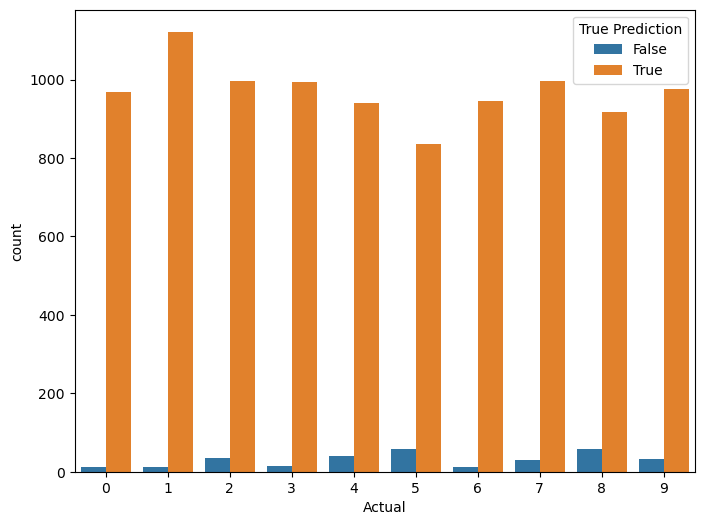

In [93]:
test_predictions = model1.predict(X_test)        
Error_test = pd.DataFrame(pd.DataFrame({'Actual': y_test, 'Predicted': np.argmax(test_predictions, axis=1)}), columns=['Actual', 'Predicted'])
Error_test.reset_index(drop=True, inplace=True)
Error_test["True Prediction"]=Error_test['Actual']==Error_test['Predicted']
plt.figure(figsize=(8, 6))
sns.countplot(data=Error_test, hue="True Prediction", x='Actual')

In [95]:
# For 5
X_train_5=[]
five=[X_train[i] for i in range(60000) if y_train[i]==9]
X_train_5=np.concatenate((X_train,five))
y_train_5=np.concatenate((y_train,[9] * len(five)))
X_train_5.shape,y_train_5.shape

((65949, 28, 28), (65949,))

In [96]:
model_5= tf.keras.models.Sequential()     
model_5.add(tf.keras.layers.Flatten())      # Converts 2D input into 1D input
model_5.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model_5.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model_5.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

model_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_5.fit(X_train_5, y_train_5, epochs=3)

print(model_5.evaluate(X_train_5, y_train_5))
print(model_5.evaluate(X_train, y_train))
print(model_5.evaluate(X_test, y_test))

Epoch 1/3
2061/2061 [==============================] - 10s 4ms/step - loss: 0.2465 - accuracy: 0.9247
Epoch 2/3
2061/2061 [==============================] - 8s 4ms/step - loss: 0.0987 - accuracy: 0.9698
Epoch 3/3
2061/2061 [==============================] - 6s 3ms/step - loss: 0.0415 - accuracy: 0.9875
[0.0414913035929203, 0.9874903559684753]
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0410 - accuracy: 0.9875
[0.04098247364163399, 0.9875333309173584]
313/313 [==============================] - 1s 3ms/step - loss: 0.0919 - accuracy: 0.9718
[0.09191987663507462, 0.9718000292778015]


313/313 [==============================] - 1s 2ms/step


C:\Users\VISHAL MAURYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\VISHAL MAURYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\VISHAL MAURYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\VISHAL MAURYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='Actual', ylabel='count'>

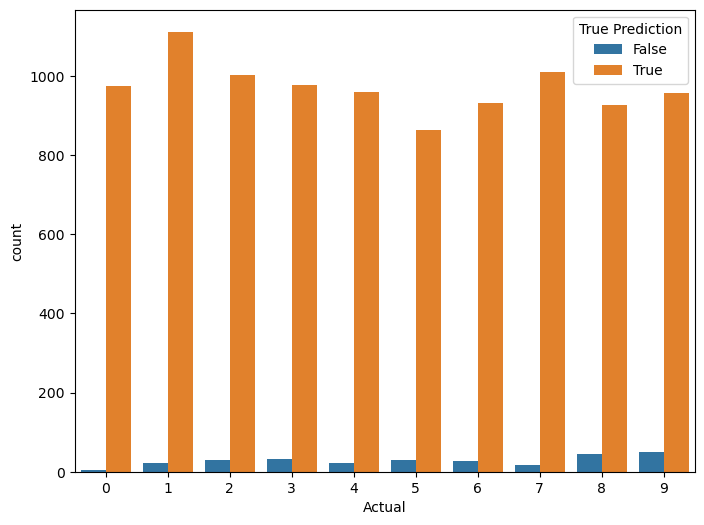

In [97]:
test_predictions = model_5.predict(X_test)
Error_test = pd.DataFrame(pd.DataFrame({'Actual': y_test, 'Predicted': np.argmax(test_predictions, axis=1)}), columns=['Actual', 'Predicted'])
Error_test.reset_index(drop=True, inplace=True)
Error_test["True Prediction"]=Error_test['Actual']==Error_test['Predicted']
plt.figure(figsize=(8, 6))
sns.countplot(data=Error_test, hue="True Prediction", x='Actual')

In [103]:
# For 5 and 9
X_train_59=[]
nine=[X_train[i] for i in range(60000) if y_train[i]==9]
five=[X_train[i] for i in range(60000) if y_train[i]==5]
X_train_59=np.concatenate((X_train,five,nine,five))
y_train_59=np.concatenate((y_train,[5]*len(five),[9] * len(nine),[5]*len(five)))
X_train_59.shape,y_train_59.shape

((76791, 28, 28), (76791,))

In [104]:
model59 = tf.keras.models.Sequential()     
model59.add(tf.keras.layers.Flatten())      # Converts 2D input into 1D input
model59.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model59.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model59.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))
model59.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model59.fit(X_train_59, y_train_59, epochs=3)
print(model59.evaluate(X_train_59, y_train_59))
print(model59.evaluate(X_train, y_train))
print(model59.evaluate(X_test, y_test))

Epoch 1/3
2400/2400 [==============================] - 11s 4ms/step - loss: 0.2249 - accuracy: 0.9316
Epoch 2/3
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0871 - accuracy: 0.9725
Epoch 3/3
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0396 - accuracy: 0.9872
[0.039629291743040085, 0.9872250556945801]
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0457 - accuracy: 0.9849
[0.04574171081185341, 0.9848999977111816]
313/313 [==============================] - 1s 2ms/step - loss: 0.0980 - accuracy: 0.9709
[0.0980280265212059, 0.9708999991416931]


313/313 [==============================] - 1s 2ms/step


C:\Users\VISHAL MAURYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\VISHAL MAURYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\VISHAL MAURYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\VISHAL MAURYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='Actual', ylabel='count'>

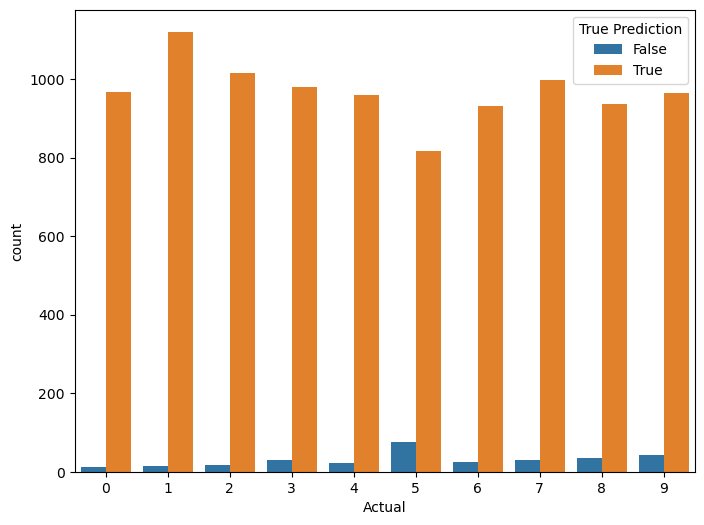

In [105]:
test_predictions = model3.predict(X_test)
Error_test = pd.DataFrame(pd.DataFrame({'Actual': y_test, 'Predicted': np.argmax(test_predictions, axis=1)}), columns=['Actual', 'Predicted'])
Error_test.reset_index(drop=True, inplace=True)
Error_test["True Prediction"]=Error_test['Actual']==Error_test['Predicted']
plt.figure(figsize=(8, 6))
sns.countplot(data=Error_test, hue="True Prediction", x='Actual')